<a href="https://colab.research.google.com/github/Roflz/stock-prediction/blob/main/Practice%20Examples%5CStock-price-predection-using-Python-main%5CTesla_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
59/59 [==============================] - 23s 252ms/step - loss: 0.0197
Epoch 2/50
59/59 [==============================] - 12s 205ms/step - loss: 0.0032
Epoch 3/50
59/59 [==============================] - 15s 250ms/step - loss: 0.0035
Epoch 4/50
59/59 [==============================] - 14s 239ms/step - loss: 0.0031
Epoch 5/50
59/59 [==============================] - 15s 264ms/step - loss: 0.0030
Epoch 6/50
59/59 [==============================] - 11s 191ms/step - loss: 0.0027
Epoch 7/50
59/59 [==============================] - 11s 180ms/step - loss: 0.0026
Epoch 8/50
59/59 [==============================] - 10s 171ms/step - loss: 0.0029
Epoch 9/50
59/59 [==============================] - 10s 165ms/step - loss: 0.0025
Epoch 10/50
59/59 [==============================] - 10s 165ms/step - loss: 0.0025
Epoch 11/50
59/59 [==============================] - 10s 174ms/step - loss: 0.0023
Epoch 12/50
59/59 [==============================] - 10s 165ms/step - loss: 0.0021
Epoch 13/50
5

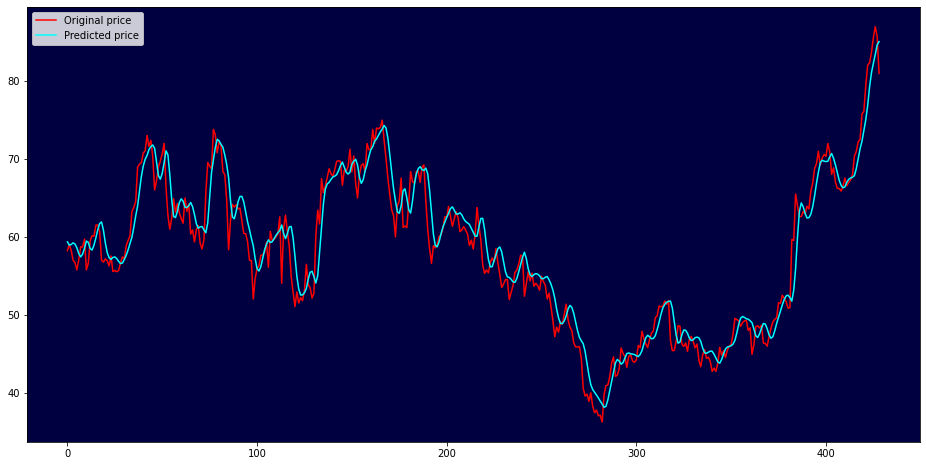

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from google.colab import files

# function to help create the datasets
# for features (x), appends the last 50 prices
# for labels (y), appends the next price
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

# upload files (only needed in google collab, otherwise just put file in cd)
# dataset = files.upload()
# read dataset
df = pd.read_csv('TSLA.csv')
# get number of trading days
df.shape

# set dimensions of dataset
df = df['Open'].values
df = df.reshape(-1, 1)

# split the data into training and testing sets
# training set is taking 1st 20% of data points (Oldest 20% of data points)
# test set is taking last 80% of data points (Most recent 80% of data points)
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

# scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

# create datasets using function
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

# initialize model as a sequential one with 96 units in the output’s dimensionality
# use return_sequences=True to make the LSTM layer with three-dimensional input and input_shape to shape our dataset
# Making the dropout fraction 0.2 drops 20% of the layers
# Finally add a dense layer with a value of 1 because we want to output one value
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# reshape data into 3d array for LSTM because it is sequential_3 which is expecting 3 dimensions, not 2
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# now compile the model
# used loss='mean_squared_error' because it is a regression problem
# use the adam optimizer to update network weights iteratively based on training data
model.compile(loss='mean_squared_error', optimizer='adam')

# Save model and start training!
# Every epoch refers to one cycle through the full training dataset
# batch size refers to the number of training examples utilized in one iteration
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

# load fitted model
model = load_model('stock_prediction.h5')

# visualize data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

# Wrapping up
# We got a very good prediction result! Imagine if you are working with multiple variables, how much more accurate the result could be?
# I also recommend you to change layers, numbers, epochs, and batch_size. Try it out for yourself and change whatever you think may improve your prediction and more accurate